>## Pair 9 -  Regresión Lineal


En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).
El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:
Deberéis separar la X y la y.
Deberéis crear el train y el test.
Ajustar vuestro modelo.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
pd.options.display.max_columns=None

#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("./Datos/coches_encoding_final.csv", index_col = 0)
df.head()

,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price_BOX,make_oe,Fuel_le,aspiration_le,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear
0,2.0,-1.063291,-0.263473,-0.518519,-1.514286,0.172709,4,0.347826,-0.285714,-0.272727,-0.333333,1.611061,13,1,0,1,0,0,0,0,0,0,1,1,0
1,2.0,-1.063291,-0.263473,-0.518519,-1.514286,0.172709,4,0.347826,-0.285714,-0.272727,-0.333333,1.611586,13,1,0,1,0,0,0,0,0,0,1,1,0
2,2.0,-0.316456,-0.119760,0.000000,-0.485714,0.535267,6,1.282609,-0.285714,-0.454545,-0.444444,1.611586,13,1,0,0,0,1,0,0,0,0,1,1,0
3,4.0,0.354430,0.203593,0.259259,0.057143,-0.105471,4,0.152174,0.428571,0.000000,0.000000,1.611153,16,1,0,0,0,0,1,0,0,1,0,1,0
4,4.0,0.303797,0.203593,0.333333,0.057143,0.536585,5,0.434783,0.428571,-0.545455,-0.888889,1.611721,16,1,0,0,0,0,1,0,1,0,0,1,0


In [3]:
#separamos los datos
X = df.drop("price_BOX", axis = 1)
y = df['price_BOX']

In [4]:
#dividinmos los datos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
#iniciamos la regresion lineal
lr= LinearRegression(n_jobs=-1)

In [6]:
#pasamos los datos de entrenamiento para que aprenda el algoritmo
lr.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [7]:
#hacemos las predicciones
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [8]:
#creamos los dataFrames
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados

,Real,Predicted,Set
199,1.612275,1.611822,Train
38,1.609721,1.609738,Train
24,1.608623,1.608856,Train
122,1.612234,1.611867,Train
197,1.611923,1.612444,Train
...,...,...,...
136,1.609149,1.609192,Test
138,1.609237,1.609439,Test
165,1.610143,1.610486,Test
76,1.609193,1.609440,Test


In [9]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.sample(10)

,Real,Predicted,Set,residuos
150,1.609298,1.609374,Test,-0.000076
164,1.610023,1.610196,Test,-0.000173
153,1.608928,1.609191,Test,-0.000263
118,1.608623,1.609026,Train,-0.000403
197,1.611923,1.612444,Train,-0.000521
144,1.609353,1.610053,Train,-0.000700
6,1.611756,1.611825,Train,-0.000069
122,1.612234,1.611867,Train,0.000367
119,1.609152,1.609143,Train,0.000008
171,1.610143,1.609874,Train,0.000269


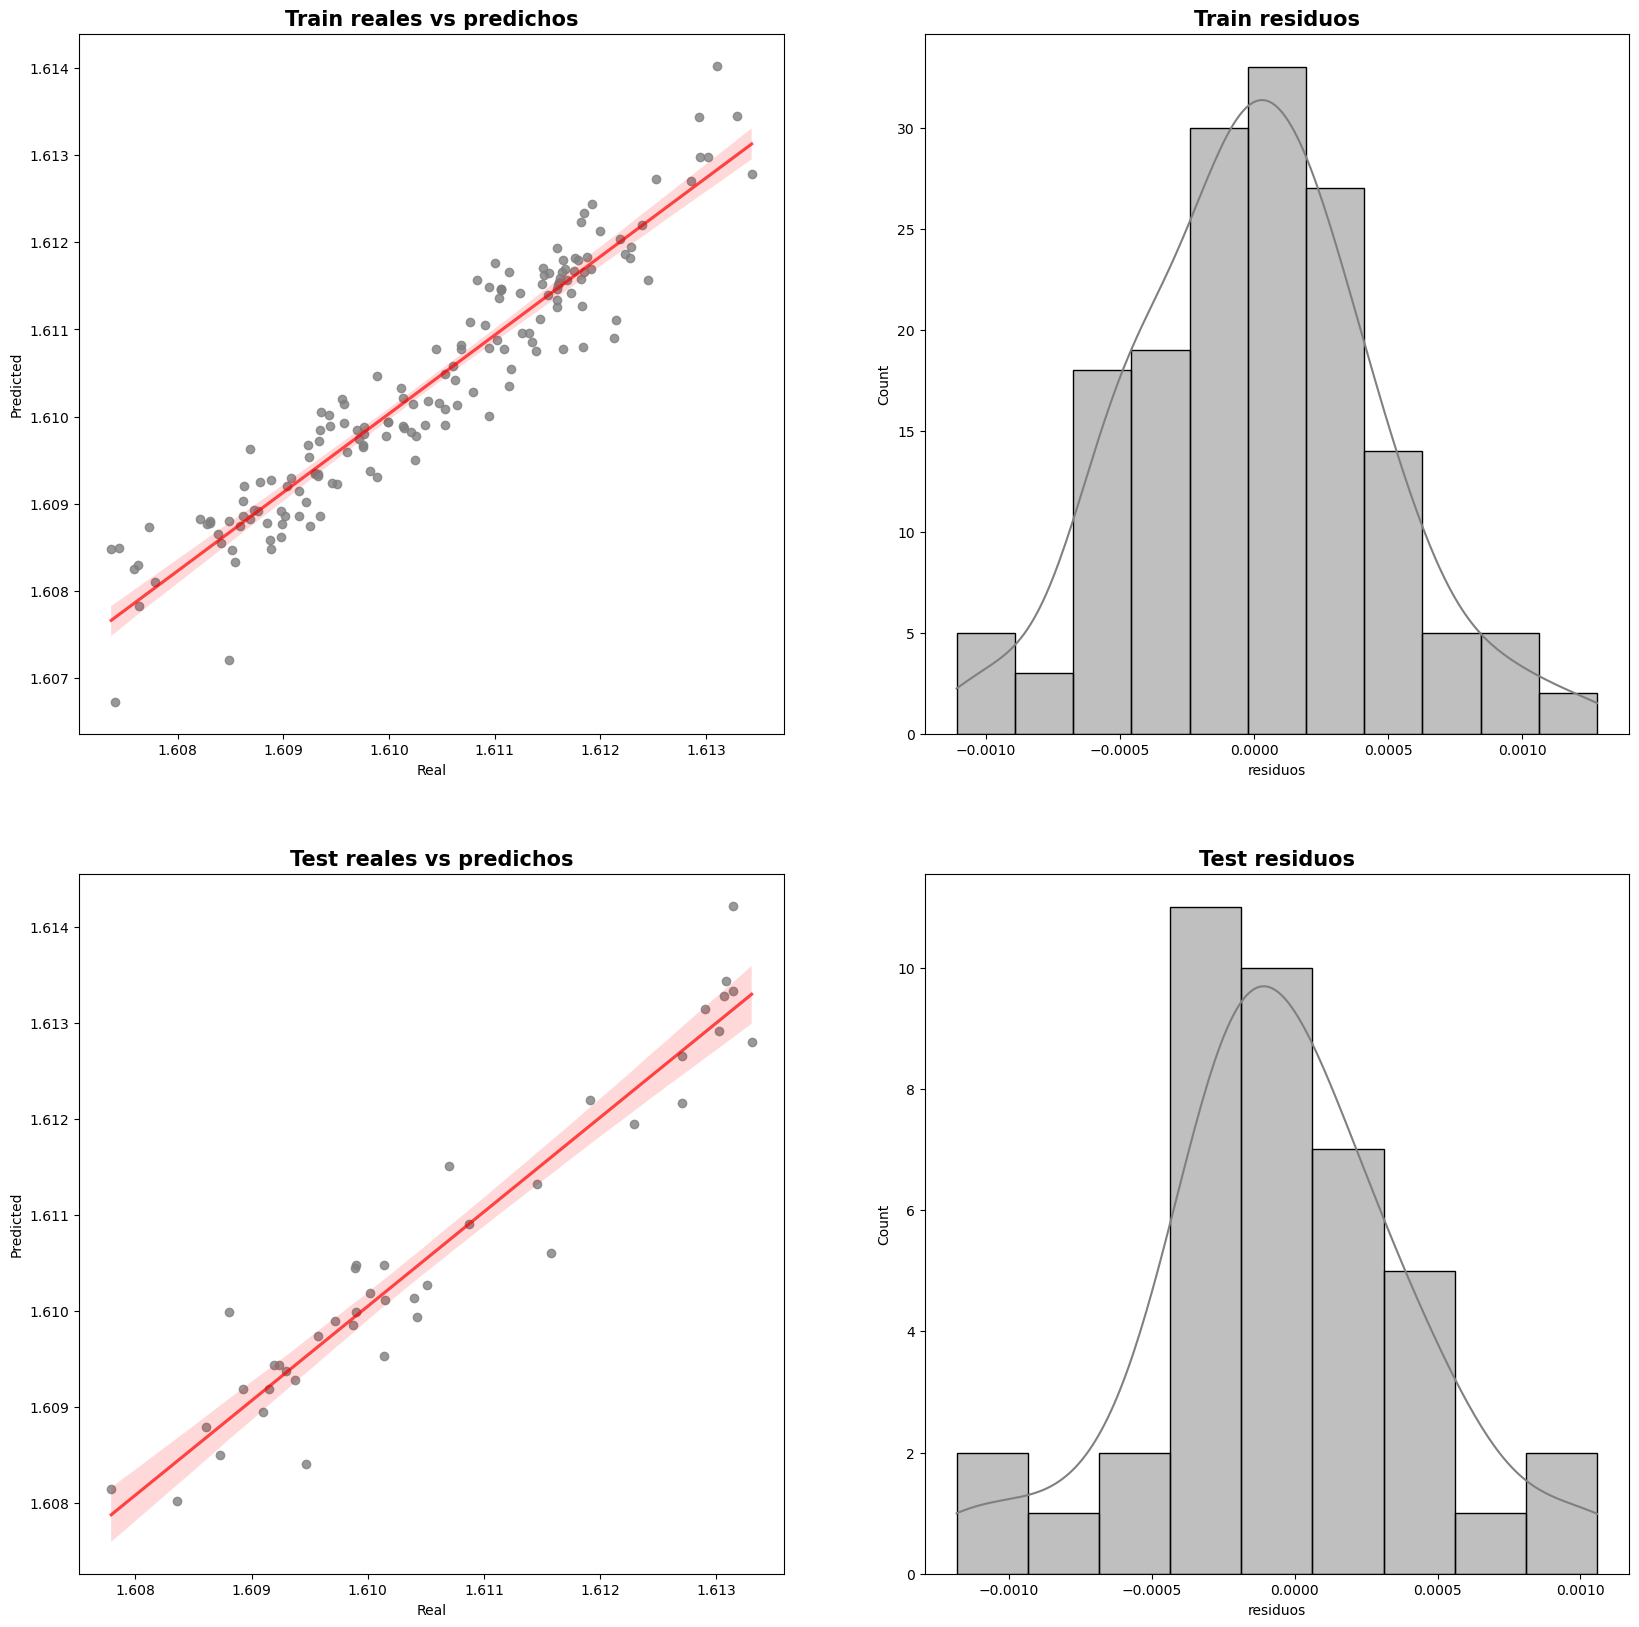

In [10]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [11]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-0.00095346 -0.00060356 -0.00071101 -0.00046193 -0.00055392 -0.00047608
 -0.00042703 -0.00040909 -0.0006192  -0.00045842]
Média métricas de validación cruzada: -0.0005673695773484878


> Comentamos los resultados

- Según los resultados, creemos que el modelo está sobreajustado,ya que los resultado que hemos obtenido están demasiado ajustados, son prácticamente iguales los resultados reales y predichos.

- En el siguiente pair comprobamos losresultados con las métricas correspondientes.

>## PAIR 10 - MÉTRICAS

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. 

Los objetivo de este pairprogramming son:

>- Calculéis las métricas para vuestro modelo

In [12]:
# Para el conjunto de entrenamsiento las métricas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))

# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))


Para el conjunto train:---------------
El valor de r2 score es  0.9029424478166618
El MAE es 0.00034734663322179824
El MSE es 1.971629798113542e-07
EL RMSE es  0.00044403038163098055
Para el conjunto test:---------------
El valor de r2 score es  0.9174623916449347
El MAE es 0.0003419339210714213
El MSE es 2.0678295738014935e-07
EL RMSE es  0.00045473394131090474


In [13]:
# Creamos un DF para comparar los resultados de las métricas con nuestro modelo.

resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.000342,2.067830e-07,0.000455,0.917462,test,Linear Regresion
1,0.000347,1.971630e-07,0.000444,0.902942,train,LinearRegression


In [16]:
#Revisar inversa boxcox

df['price_BOX'].max()

1.6134300605178922

In [17]:
df['price_BOX'].min()

1.607372702926197

>- Discutid los resultados de las métricas y extraed conclusiones


Comprobamos los valores de nuestras métricas y discutimos los resultados:

- Empecemos con el R², si nos fijamos en el del *train*, tenemos un valor de 0.902942, es decir, nuestro modelo es capaz de explicar un 90% de la variación en el valor de los precios de los distintos coches. Es decir, nuestras variables predictoras explican en un 90% de la variación de los precios de los coches. Según nuetsro modelo, las variables predictoras son capaces de predecir de forma casi perfecta el precio del coche atendiendo a los efectos de las distintas variables predictoras.

- Veamos con el MAE, el MSE y RMSE, vemos que los valores en general están bastante cerca de 0, lo que nos indica que nuestro modelo es bueno, es decir, que comente pocos errores en las predicciones. 

- Aquí merece una especial mención el `RMSE`, que si bien el resto de las métricas suelen ser ambiguas esta métrica si la podemos "traducir a humano". En nuestro caso tenemos un valor de RMSE en el *train*. `<-- preguntar a Ana` Creemos que nuetsro modelo es bueno, porque el valor de nuestro RMSE en el *train* es muy bajo, hay un porcentaje de error en la predicción del precio del coche de 0,00044(€).



Además de esta comparación de métricas podemos evaluar si nuestro modelo esta sobrestimado o no (*overfitting* o *underfitting*), ¿cómo sabremos si tener *overfitting*, *underfitting* o nada de eso?


- Si los valores del *train* son MUCHO MEJOR (que es tener métricas más bajas, excepto en el R² que sería tener valores más altos) que los del *test* --> ***overfitting***. En este caso, nuestro modelo se estaría aprendiendo de memoria los datos de entrenamiento y no sería capaz de hacer buenas predicciones fuera de ese set de datos.


- Si los valores del *train* son MUCHO PEOR (valores de las métricas más altas, excepto en el R² que sería tener valores más bajos) que los del *test* --> ***underfitting***. En este caso, nuestro modelo no es lo suficientemente bueno para generalizar a los datos de test ni para modelar decentemente los del *train*.




>- Guardad los resultados de las métricas en un csv para usarlo más adelante.


In [ ]:
df_resultados.to_csv("datos/coches_resultados_LR.csv")